In [1]:
from pylab import *
import matplotlib
import matplotlib.colors

In [26]:
names = ['meshk','mesh','vertsk','verts','icp','cpd']
#data_20k_fullverts/
res = [np.loadtxt('data_monday_final_k100/{}2.csv'.format(n),delimiter=',') for n in names]
names[0] = 'mesh\n(kmeans)'
names[1] = 'mesh\n(random)'
names[2] = 'points\n(kmeans)'
names[3] = 'points\n(random)'

Text(0, 0.5, 'translation error')

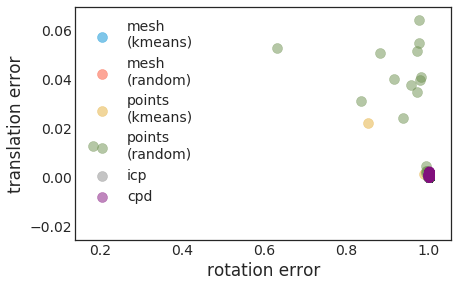

In [27]:
for x,l in zip(res,names):
    plt.scatter(np.sqrt(x[:,0]**2),x[:,1],label=l,s=100,alpha=0.5)
plt.legend()
plt.xlabel('rotation error')
plt.ylabel('translation error')


In [28]:
[(min(X),max(X)) for X in [_[:,0] for _ in res]]

[(-0.9999745774121408, 0.9999999804824086),
 (0.999960127536483, 0.9999999230803606),
 (0.8528162338530363, 0.9999997889397972),
 (-0.18303813372087951, 0.999999081964756),
 (0.9990906826102871, 0.9999980337025408),
 (0.9992903910498575, 0.99999906913847)]

[0.32555952463214943, 0.3683393463545041, 1.052945711242767, 3.632655671556215, 1.8954067652895064, 1.290910008656566]
[0.00015452912294683296, 0.00016887564268243686, 0.0004622341094890767, 0.0026537894979086997, 0.0006740648370998493, 0.0009911646983148646]


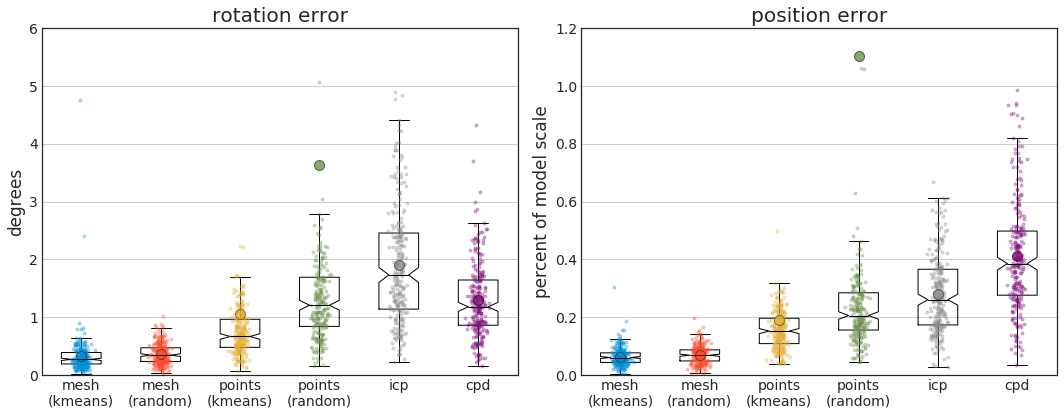

In [29]:
from matplotlib import rc
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
#plt.rcParams["font.family"] = "sans-serif"
rc('font',**{'family':'sans-serif','sans-serif':['cm']})
#plt.rcParams['font.sans-serif'] = ['Helvetica']
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
model_scale = np.sqrt((0.1513)**2 + (0.1483)**2 + (0.1144)**2)

angle_errors = []
for result in res:
    #new_res = np.minimum(2*np.arccos(result[:,0]),2*np.arccos(-result[:,0]))
    new_res = np.clip(2*result[:,0]**2-1,1e-9,1-1e-9)
    new_res =np.arccos(new_res)
    new_res[np.isnan(new_res)] = np.pi
    angle_errors.append(new_res*180.0/np.pi)

plt.boxplot([_ for _ in angle_errors],labels=names,notch=True,flierprops={'marker':''},medianprops={'color':'k'})
plt.title('rotation error')
plt.ylabel('degrees')
#plt.ylim(0,.05)
#plt.ylim(top=4,bottom=0)
plt.ylim(bottom=0)
for i,err in enumerate(res):
    y = angle_errors[i]
    x = np.random.normal(i+1, 0.05, size=len(y))
    p = plt.plot(x,y,'.',alpha=0.3)
    plt_color = matplotlib.colors.hex2color(p[0].get_color())
    clr2 = tuple(np.array(plt_color)*0.5)
    plt.plot(i+1,y.mean(),'.',c=plt_color,ms=20,alpha=0.8,mec=clr2,lw=1.0)
plt.ylim(top=6)
plt.grid(True,axis='y')
plt.subplot(1,2,2)

plt.boxplot([_[:,1]/model_scale * 100 for _ in res],labels=names,notch=True,flierprops={'marker':''},medianprops={'color':'k'})
#plt.ylim(0,0.01)
plt.title('position error')
plt.ylabel('percent of model scale')
#print([2*np.arccos(abs(_[:,0])).mean() for _ in res])
print([_.mean() for _ in angle_errors])

print([_[:,1].mean() for _ in res])
#print([2*np.arccos(abs(_[:,0])).max() for _ in res])

plt.ylim(bottom=0)
for i,err in enumerate(res):
    y = err[:,1]/model_scale * 100
    x = np.random.normal(i+1, 0.05, size=len(y))
    p = plt.plot(x,y,'.',alpha=0.3)
    plt_color = matplotlib.colors.hex2color(p[0].get_color())
    clr2 = tuple(np.array(plt_color)*0.5)
    plt.plot(i+1,y.mean(),'.',c=plt_color,ms=20,alpha=0.8,mec=clr2,lw=1.0)
#plt.ylim(top=0.025/0.05)
plt.ylim(top=1.2)
plt.grid(True,axis='y')
plt.tight_layout()
fig.savefig('new-viz-k100.pdf', facecolor=fig.get_facecolor(), edgecolor='none')

In [30]:
plt.rcParams

/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.forma